# Importing the Libraries:

In [243]:
# Pandas for reading the data:
import pandas as pd

# Libraries for plotting of the data:
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for Preprocessing of the data:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import category_encoders as ce

# Libraries for Predicting on the data:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Metrics to measure how good we do with predicting on the data:
from sklearn.metrics import *

# Visualizing the Data:

Reading the data:

In [244]:
data = pd.read_csv("../input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv")
data.head(7)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0
5,6,Sweden,GERD INGA MAGNHILD,AHLSTROM,F,71,P,0
6,7,Sweden,HJALMAR,AHLSTROM,M,60,P,0


Lets define the labels or on what column would we be predicting on using the data:

In [245]:
survived = data['Survived']

# Dropping the labels.
# Also dropping the PassengerId, Firstname and Lastname columns because they seem useless:
data.drop(['PassengerId', 'Firstname', 'Lastname', 'Survived'], axis=1, inplace=True)

Lets make some countplots to check the proportion of various features:

In [246]:
data.head()

,Country,Sex,Age,Category
0,Sweden,M,62,P
1,Estonia,F,22,C
2,Estonia,F,21,C
3,Sweden,M,53,C
4,Sweden,F,55,P


What proportion of people survived?

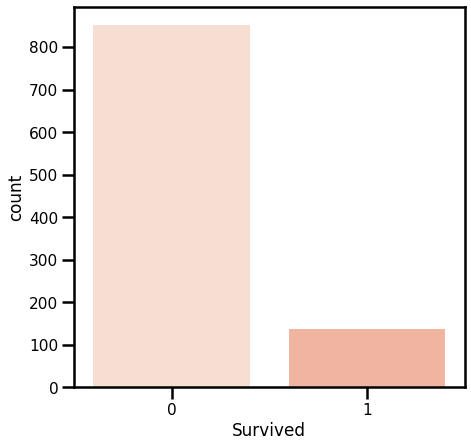

In [247]:
plt.figure(figsize=(7,7))
sns.set_context("poster", font_scale=0.7)
sns.set_palette("Reds")
sns.countplot(survived)

How many men and women were aboard?

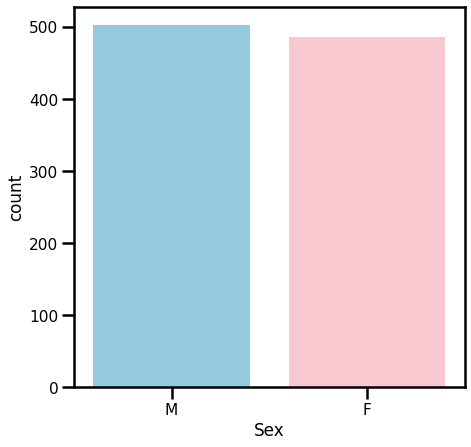

In [248]:
sns.set_palette(['skyblue', 'pink'])
plt.figure(figsize=(7,7))
sns.countplot(data['Sex'])

What is the distribuition of various countries the passengers were from?

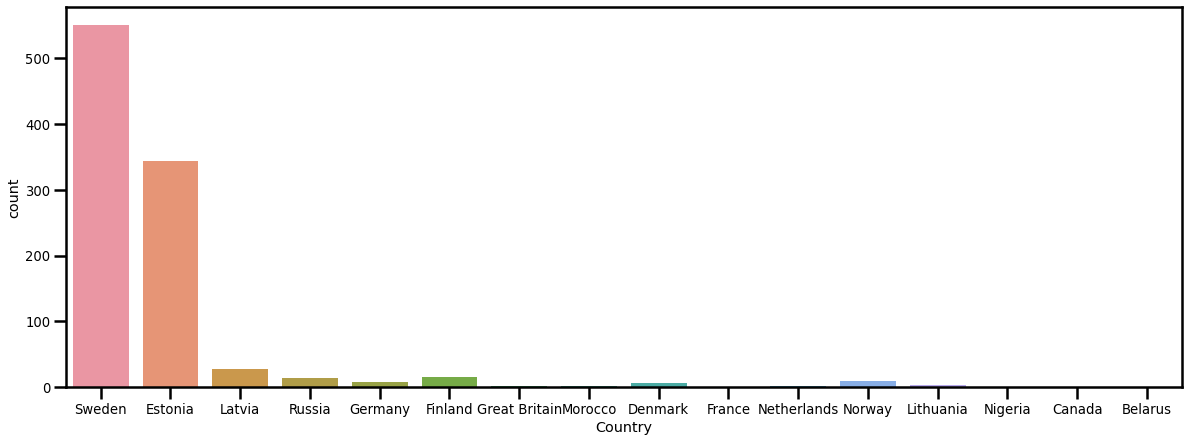

In [249]:
plt.figure(figsize=(20,7))
sns.set_context("poster", font_scale=0.6)
sns.countplot(data['Country'])

What was the distribution of men and women of different ages?

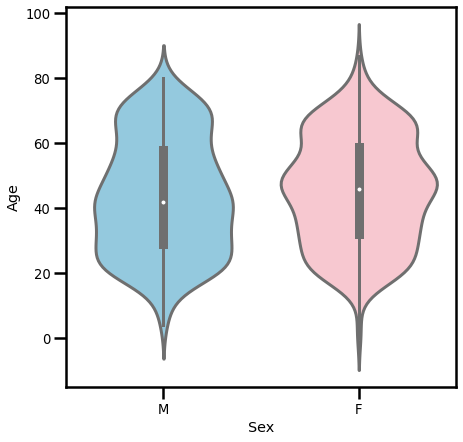

In [250]:
plt.figure(figsize=(7,7))
sns.violinplot(data=data, x='Sex',y='Age')

# Preprocessing the Data:

Lets find out the missing values in the data:

In [251]:
data.isnull().sum()

Country     0
Sex         0
Age         0
Category    0
dtype: int64

So, no missing or NaN values!

*Lets encode the labels, *defining the categorical columns:

In [252]:
c = (data.dtypes == 'object')

categorical = list(c[c].index)

Its time to use the Cat Boost Encoder from category encoders to encode the categorical columns: 

In [253]:
cat = ce.CatBoostEncoder()

# Fitting the data to the labels:
cat.fit(data[categorical], survived)

# Transforming the columns:
data[categorical] = cat.transform(data[categorical])

So, the final step of preprocessing would be the Standardisation of the values in the model:

In [254]:
scale = StandardScaler()
scaleddata = pd.DataFrame(scale.fit_transform(data), columns=data.columns)

Splitting the data:

In [255]:
train, test, ytrain, ytest = train_test_split(scaleddata, y, train_size=0.7, test_size=0.3)

# Training and Predicting:

Using Random Forests:

In [256]:
ran = RandomForestClassifier(n_estimators=500)

ran.fit(train, ytrain)

ranpred = ran.predict(test)


In [257]:
print("The Accuracy of this model is :", accuracy_score(ranpred, ytest)*100)

The Accuracy of this model is : 82.15488215488216


Using XGBoost Classifier:

In [258]:
xgb = XGBClassifier(n_estimators=300)

xgb.fit(train, ytrain)

xpred = xgb.predict(test)

In [262]:
print("The Accuracy of this model is :", accuracy_score(xpred, ytest)*100)

The Accuracy of this model is : 85.18518518518519


Using Decision Tree Classifier:

In [260]:
tree = DecisionTreeClassifier()

tree.fit(train, ytrain)

treepred = tree.predict(test)

In [263]:
print("The Accuracy of this model is :", accuracy_score(treepred, ytest)*100)

The Accuracy of this model is : 85.18518518518519


Thank you for going through this notebook, if you liked it an upvote would be appreciated! :D